Preparing raw data...


  0%|                                                                                       | 0/123957 [00:00<?, ?it/s]

Constructing circumstances...


100%|███████████████████████████████████████████████████████████████████████| 123957/123957 [00:03<00:00, 36527.34it/s]


Writing to raw data file...
No existing output file found.
Reading raw data input...


  0%|                                                                                       | 0/123957 [00:00<?, ?it/s]

Categorising MOs...


100%|███████████████████████████████████████████████████████████████████████| 123957/123957 [00:02<00:00, 49032.49it/s]


Writing labelled data output...
Saved to excel
Preparing data...
Filtering dataframe...
Cleaning problematic features...
Encoding categorical features...
Encoding "extended" (1/33)
Encoding "attacktype1" (2/33)
Encoding "attacktype2" (3/33)
Encoding "attacktype3" (4/33)
Encoding "weaptype1" (5/33)
Encoding "weaptype2" (6/33)
Encoding "weaptype3" (7/33)
Encoding "weaptype4" (8/33)
Encoding "weapsubtype1" (9/33)
Encoding "weapsubtype2" (10/33)
Encoding "weapsubtype3" (11/33)
Encoding "weapsubtype4" (12/33)
Encoding "success" (13/33)
Encoding "suicide" (14/33)
Encoding "claimed" (15/33)
Encoding "claimmode" (16/33)
Encoding "claim2" (17/33)
Encoding "claimmode2" (18/33)
Encoding "claim3" (19/33)
Encoding "claimmode3" (20/33)
Encoding "compclaim" (21/33)
Encoding "property" (22/33)
Encoding "ishostkid" (23/33)
Encoding "ransom" (24/33)
Encoding "targtype1" (25/33)
Encoding "targsubtype1" (26/33)
Encoding "targtype2" (27/33)
Encoding "targsubtype2" (28/33)
Encoding "targtype3" (29/33)
Encod

C:\Users\joeri\Documents\Projects\git\gtd\mo_classification.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature] = data_preparation.encode_labels(dataset[feature])


Actual number of incidents included in current dataset: 15108
Number of classes involved: 2
Cross-validating (using 3 folds): RandomForestClassifier(class_weight='balanced', n_jobs=-1)
Binary
Results:  {
    "fit_time": "[2.80193496 0.91031647 0.87235451]",
    "score_time": "[0.24274826 0.10522246 0.11636686]",
    "test_accuracy": "[0.76528991 0.81989674 0.73649722]",
    "test_f1_macro": "[0.75789738 0.81675897 0.72700621]",
    "test_f1_weighted": "[0.76444985 0.82047288 0.7348699 ]",
    "test_precision": "[0.7869016  0.85898816 0.75749674]",
    "test_recall": "[0.81396149 0.82324622 0.7994496 ]",
    "test_roc_auc": "[0.83513848 0.89263171 0.80033779]"
}
Average results:  {
    "fit_time": 1.528201977411906,
    "score_time": 0.15477919578552246,
    "test_accuracy": 0.7738946253640455,
    "test_f1_macro": 0.7672208506308195,
    "test_f1_weighted": 0.7732642093366439,
    "test_precision": 0.8011288318677854,
    "test_recall": 0.8122191024305827,
    "test_roc_auc": 0.8427026

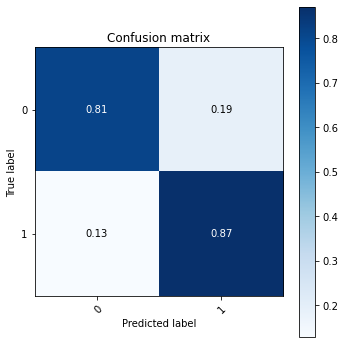

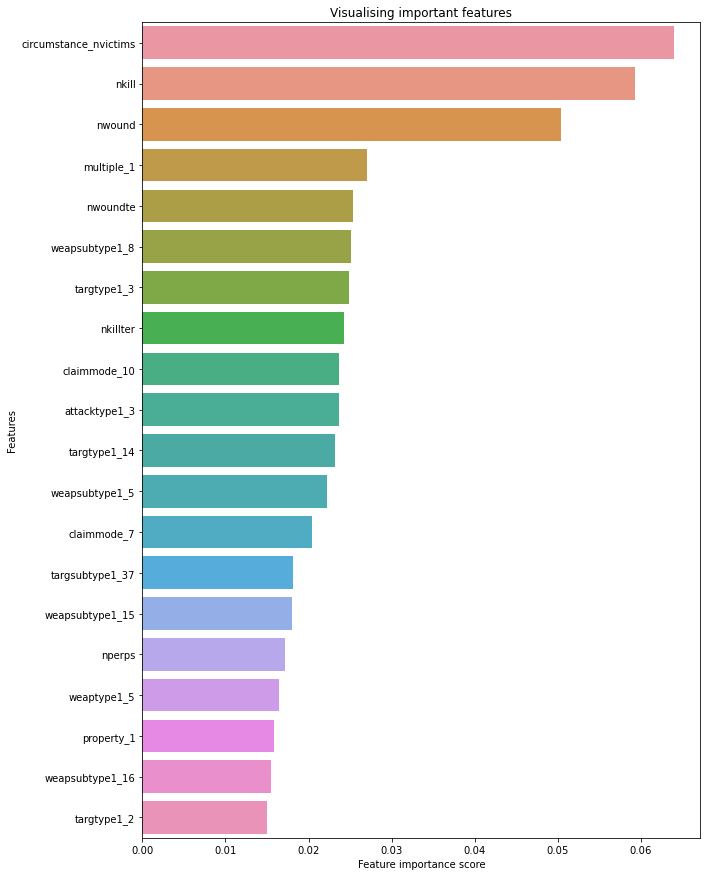

<Figure size 720x1080 with 0 Axes>

In [1]:
from IPython.core.display import display, HTML
import warnings
%matplotlib inline  
display(HTML("<style>.container { width:90% !important; }</style>"))
warnings.simplefilter(action='ignore', category=FutureWarning)
%run "../main.py"

In [2]:
import pandas
df = pd.read_excel("../../../unversioned/GTD_data/rawData.xlsx")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,circumstance_time,circumstance_nvictims
0,199801010001,1998,1,1,NaN,0,NaT,34,Burundi,11,...,“Burundi--Attack Reported on Bujumbura Airport...,NaN,CETIS,0,1,0,1,NaN,1998-1-1,10
1,199801010002,1998,1,1,NaN,0,NaT,167,Russia,9,...,"“Bomb injures 3 in Moscow subway,” Charleston ...","“Bomb Injures 3 Workers in Moscow Metro,” Los ...",CETIS,-9,-9,0,-9,NaN,1998-1-1,3
2,199801010003,1998,1,1,NaN,0,NaT,603,United Kingdom,8,...,“Ulster Peace Shattered by Shooting: Catholic ...,NaN,CETIS,0,0,1,1,NaN,1998-1-1,1
3,199801020001,1998,1,2,NaN,0,NaT,95,Iraq,10,...,"Farouk Choukri , “Iraq, UN Officials Continue ...","“Iraqi Interior Minister on UNSCOM Attack, Kuw...",CETIS,-9,-9,1,1,NaN,1998-1-2,0
4,199801020002,1998,1,2,NaN,0,NaT,155,West Bank and Gaza Strip,10,...,“Israeli Woman Critically Hurt by Gunfire in W...,NaN,CETIS,-9,-9,0,-9,NaN,1998-1-2,1


In [6]:
df[df['gname'] == 'Taliban'][{'circumstance_nvictims', 'nkill', 'nwound', 'multiple', 'nwoundte','nkillter'}].mean()

nwound                   4.151378
nwoundte                 1.079533
circumstance_nvictims    5.107073
multiple                 0.191677
nkillter                 2.130125
nkill                    4.533493
dtype: float64

In [7]:
df[df['gname'] == 'Islamic State of Iraq and the Levant (ISIL)'][{'circumstance_nvictims', 'nkill', 'nwound', 'multiple', 'nwoundte','nkillter'}].mean()

nwound                   5.981635
nwoundte                 0.162272
circumstance_nvictims    9.511825
multiple                 0.307753
nkillter                 1.981172
nkill                    7.145978
dtype: float64

In [32]:
df[(df['gname'] == 'Taliban') | (df['gname'] == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['gname','targtype1']).size()

gname                                        targtype1
Islamic State of Iraq and the Levant (ISIL)  1             285
                                             2             186
                                             3             767
                                             4            1657
                                             6               6
                                             7               8
                                             8              29
                                             9               8
                                             10             61
                                             12             10
                                             13             12
                                             14           2533
                                             15            128
                                             17            257
                                             18              2
